# Assignment 1 - Experiments with Machine Learning
Alice Chen
Georgia Pitic
Ryan Kim

Path: deliverable.ipynb

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import os.path


### 1. Load Data

In [4]:
dataPenguins = pd.read_csv('penguins.csv')
dataAbalone = pd.read_csv('abalone.csv')

# a. Penguin dataset: Methods of convertion
# i. Convert dummy coded data
# dataPenguins = pd.get_dummies(dataPenguins, columns=['island', 'sex'])
# dataPenguins.to_csv('penguins_with_dummies.csv', index=False)
# dataPenguinsWithDummy = pd.read_csv('penguins_with_dummies.csv')

# ii. Convert categorical data
le = LabelEncoder()
dataPenguins['island'] = le.fit_transform(dataPenguins['island'])
dataPenguins['sex'] = le.fit_transform(dataPenguins['sex'])

dataPenguins.to_csv('penguins_with_dummies.csv', index=False)
dataPenguinsWithDummy = pd.read_csv('penguins_with_dummies.csv')

# b. Abalone dataset: Methods of convertion
#  Do not need to convert data as only goal (Type) is categorical and goal does not need to be converted into numerical data

### 2. Plot the percentages of each class

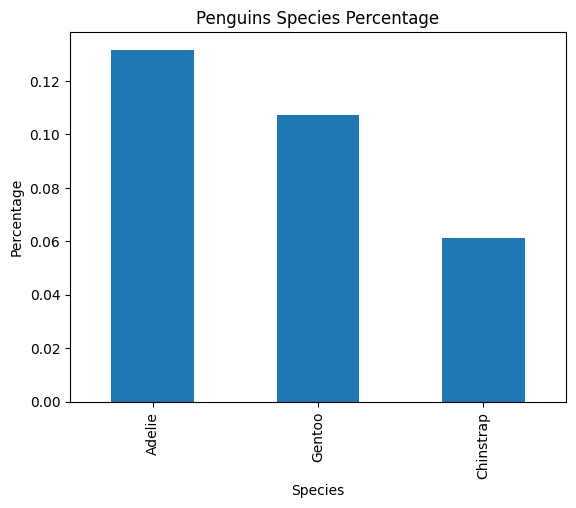

In [102]:
# Penguins plot percentage
dataPenguinsPercentage = (dataPenguinsWithDummy['species'].value_counts(normalize=True) / len(dataPenguinsWithDummy)) * 100

dataPenguinsPercentage.plot(kind='bar')
plt.title('Penguins Species Percentage')
plt.xlabel('Species')
plt.ylabel('Percentage')
plt.savefig('penguinsPercentage.png')
plt.show()

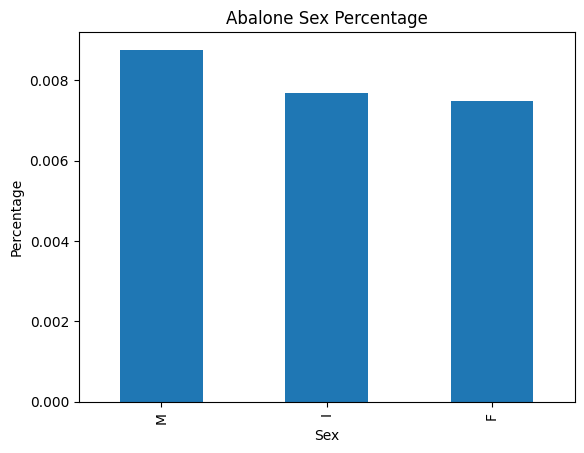

In [103]:
# Abalone plot percentage
dataAbalonePercentage = (dataAbalone['Type'].value_counts(
    normalize=True) / len(dataAbalone)) * 100

dataAbalonePercentage.plot(kind='bar')
plt.title('Abalone Sex Percentage')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.savefig('abalonePercentage.png')
plt.show()

- From analsis of dataset: classes are more balanced for abalone than penguins' dataset, as the percentage of abalone's classes are more approximately the same. 
- Since the classes are more balanced for abalone, accuracy is more appropriate to use to evaluate the performance. 
- Since the classes are less balanced for penguins, precision, recall, and F1 score are more appropriate to use to evaluate the performance.

### 3. Split dataset using train test split

In [9]:
# a. Penguins
X_penguins = dataPenguinsWithDummy.drop(['species'], axis=1)
y_penguins = dataPenguinsWithDummy['species']
X_penguinsTrain, X_penguinsTest, y_penguinsTrain, y_penguinsTest = train_test_split(X_penguins, y_penguins)

# b. Abalone
X_abalone = dataAbalone.drop(['Type'], axis=1)
y_abalone = dataAbalone['Type']
X_abaloneTrain, X_abaloneTest, y_abaloneTrain, y_abaloneTest = train_test_split(X_abalone, y_abalone)

### 4. Train and test 4 different classifiers

#### 4a Base DT

[Text(0.6527777777777778, 0.9285714285714286, 'x[3] <= 206.5\ngini = 0.644\nsamples = 249\nvalue = [107, 55, 87]'),
 Text(0.4722222222222222, 0.7857142857142857, 'x[1] <= 43.35\ngini = 0.439\nsamples = 157\nvalue = [106, 51, 0]'),
 Text(0.2777777777777778, 0.6428571428571429, 'x[1] <= 42.3\ngini = 0.088\nsamples = 108\nvalue = [103, 5, 0]'),
 Text(0.16666666666666666, 0.5, 'x[2] <= 16.7\ngini = 0.02\nsamples = 98\nvalue = [97, 1, 0]'),
 Text(0.1111111111111111, 0.35714285714285715, 'x[1] <= 39.3\ngini = 0.219\nsamples = 8\nvalue = [7, 1, 0]'),
 Text(0.05555555555555555, 0.21428571428571427, 'gini = 0.0\nsamples = 7\nvalue = [7, 0, 0]'),
 Text(0.16666666666666666, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.2222222222222222, 0.35714285714285715, 'gini = 0.0\nsamples = 90\nvalue = [90, 0, 0]'),
 Text(0.3888888888888889, 0.5, 'x[2] <= 17.45\ngini = 0.48\nsamples = 10\nvalue = [6, 4, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'gini = 0.0\nsamples =

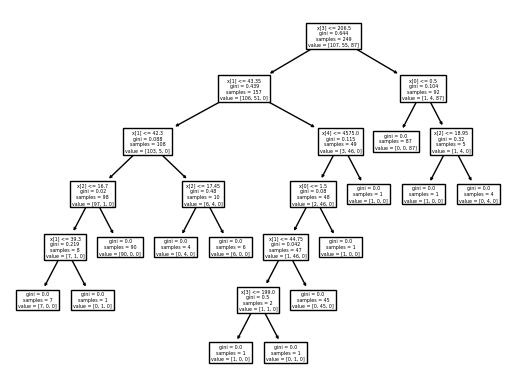

In [10]:
dtc_penguins = tree.DecisionTreeClassifier()

# i. Penguins
dtc_penguins.fit(X_penguinsTrain, y_penguinsTrain)
tree.plot_tree(dtc_penguins)

[Text(0.5, 0.9, 'x[5] <= 0.131\ngini = 0.665\nsamples = 3132\nvalue = [980, 990, 1162]'),
 Text(0.25, 0.7, 'x[7] <= 8.5\ngini = 0.512\nsamples = 1146\nvalue = [165, 748, 233]'),
 Text(0.125, 0.5, 'x[6] <= 0.128\ngini = 0.359\nsamples = 788\nvalue = [56, 618, 114]'),
 Text(0.0625, 0.3, 'x[2] <= 0.113\ngini = 0.282\nsamples = 609\nvalue = [25, 510, 74]'),
 Text(0.03125, 0.1, 'gini = 0.26\nsamples = 555\nvalue = [19, 473, 63]'),
 Text(0.09375, 0.1, 'gini = 0.477\nsamples = 54\nvalue = [6, 37, 11]'),
 Text(0.1875, 0.3, 'x[2] <= 0.163\ngini = 0.556\nsamples = 179\nvalue = [31, 108, 40]'),
 Text(0.15625, 0.1, 'gini = 0.546\nsamples = 176\nvalue = [28, 108, 40]'),
 Text(0.21875, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.375, 0.5, 'x[7] <= 9.5\ngini = 0.665\nsamples = 358\nvalue = [109, 130, 119]'),
 Text(0.3125, 0.3, 'x[0] <= 0.472\ngini = 0.602\nsamples = 147\nvalue = [26, 78, 43]'),
 Text(0.28125, 0.1, 'gini = 0.639\nsamples = 96\nvalue = [19, 39, 38]'),
 Text(0.34375, 0.1

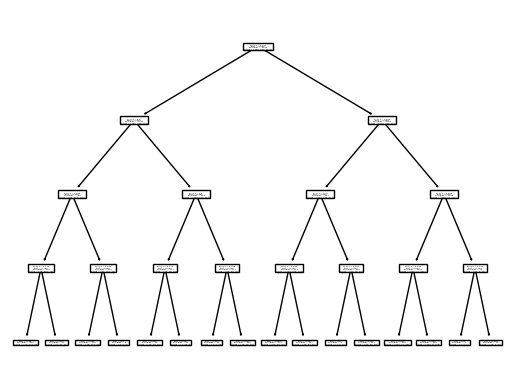

In [11]:
dtc_abalone = tree.DecisionTreeClassifier(max_depth=4)

# ii. Abalone
dtc_abalone.fit(X_abaloneTrain, y_abaloneTrain)
tree.plot_tree(dtc_abalone)

#### 4b Top DT

[Text(0.625, 0.9, 'x[3] <= 206.5\nentropy = 1.535\nsamples = 249\nvalue = [107, 55, 87]'),
 Text(0.4166666666666667, 0.7, 'x[1] <= 42.3\nentropy = 0.91\nsamples = 157\nvalue = [106, 51, 0]'),
 Text(0.25, 0.5, 'x[2] <= 16.7\nentropy = 0.082\nsamples = 98\nvalue = [97, 1, 0]'),
 Text(0.16666666666666666, 0.3, 'x[1] <= 39.3\nentropy = 0.544\nsamples = 8\nvalue = [7, 1, 0]'),
 Text(0.08333333333333333, 0.1, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0, 0]'),
 Text(0.25, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3333333333333333, 0.3, 'entropy = 0.0\nsamples = 90\nvalue = [90, 0, 0]'),
 Text(0.5833333333333334, 0.5, 'x[4] <= 4062.5\nentropy = 0.616\nsamples = 59\nvalue = [9, 50, 0]'),
 Text(0.5, 0.3, 'entropy = 0.0\nsamples = 43\nvalue = [0, 43, 0]'),
 Text(0.6666666666666666, 0.3, 'x[1] <= 45.9\nentropy = 0.989\nsamples = 16\nvalue = [9, 7, 0]'),
 Text(0.5833333333333334, 0.1, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 7\

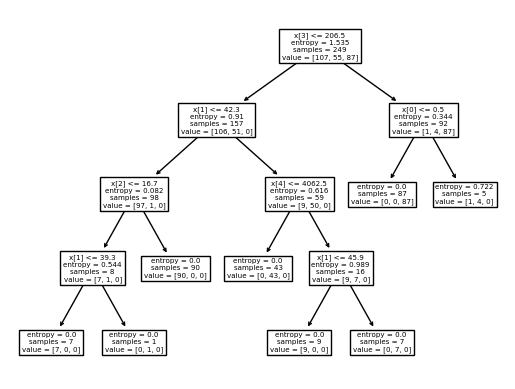

In [12]:
dt_params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, None],
    'min_samples_split': [2, 4, 6],
}

# i. Penguins
topDTC_penguins = tree.DecisionTreeClassifier()
grid_search_penguins = GridSearchCV(estimator=topDTC_penguins, param_grid=dt_params_grid)
grid_search_penguins.fit(X_penguinsTrain, y_penguinsTrain)
best_dt_classifier_penguins = grid_search_penguins.best_estimator_
tree.plot_tree(best_dt_classifier_penguins)


[Text(0.5217391304347826, 0.9285714285714286, 'x[5] <= 0.131\ngini = 0.665\nsamples = 3132\nvalue = [980, 990, 1162]'),
 Text(0.24728260869565216, 0.7857142857142857, 'x[7] <= 8.5\ngini = 0.512\nsamples = 1146\nvalue = [165, 748, 233]'),
 Text(0.1331521739130435, 0.6428571428571429, 'x[6] <= 0.128\ngini = 0.359\nsamples = 788\nvalue = [56, 618, 114]'),
 Text(0.08152173913043478, 0.5, 'x[2] <= 0.113\ngini = 0.282\nsamples = 609\nvalue = [25, 510, 74]'),
 Text(0.043478260869565216, 0.35714285714285715, 'x[0] <= 0.387\ngini = 0.26\nsamples = 555\nvalue = [19, 473, 63]'),
 Text(0.021739130434782608, 0.21428571428571427, 'x[6] <= 0.09\ngini = 0.306\nsamples = 385\nvalue = [16, 316, 53]'),
 Text(0.010869565217391304, 0.07142857142857142, 'gini = 0.284\nsamples = 377\nvalue = [14, 315, 48]'),
 Text(0.03260869565217391, 0.07142857142857142, 'gini = 0.531\nsamples = 8\nvalue = [2, 1, 5]'),
 Text(0.06521739130434782, 0.21428571428571427, 'x[5] <= 0.095\ngini = 0.143\nsamples = 170\nvalue = [3, 1

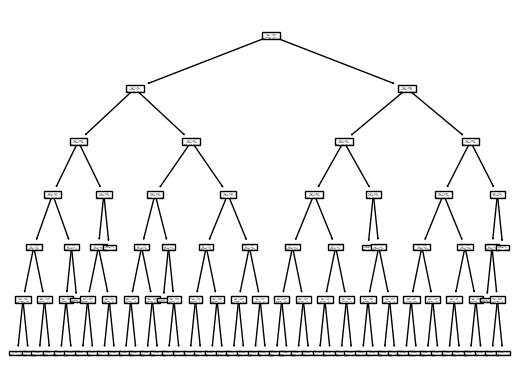

In [13]:
# ii. Abalone

topDTC_abalone = tree.DecisionTreeClassifier(max_depth=4)
grid_search_abalone = GridSearchCV(estimator=topDTC_abalone, param_grid=dt_params_grid)
grid_search_abalone.fit(X_abaloneTrain, y_abaloneTrain)
best_dt_classifier_abalone = grid_search_abalone.best_estimator_
tree.plot_tree(best_dt_classifier_abalone)

#### 4c Base MLP

In [14]:
mlp_penguins = MLPClassifier(hidden_layer_sizes=(100, 100) ,activation='logistic', solver='sgd')

# i. Penguins
mlp_penguins.fit(X_penguinsTrain, y_penguinsTrain)

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              solver='sgd')

In [15]:
# ii. Abalone
mlp_abalone = MLPClassifier(hidden_layer_sizes=(100, 100) ,activation='logistic', solver='sgd')

mlp_abalone.fit(X_abaloneTrain, y_abaloneTrain)

c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              solver='sgd')

#### 4d Top MLP

In [16]:
# i. Penguins

mlp_param_grid = {
    'activation': ['logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['adam', 'sgd'],
}
mlp = MLPClassifier(max_iter=200)

grid_search_mlp_penguins = GridSearchCV(estimator=mlp, param_grid=mlp_param_grid)
grid_search_mlp_penguins.fit(X_penguinsTrain, y_penguinsTrain) 

c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
                         'solver': ['adam', 'sgd']})

In [17]:
# ii. Abalons

mlp_param_grid = {
    'activation': ['logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['adam', 'sgd'],
}
mlp = MLPClassifier(max_iter=200)

grid_search_mlp_abalone = GridSearchCV(estimator=mlp, param_grid=mlp_param_grid)
grid_search_mlp_abalone.fit(X_abaloneTrain, y_abaloneTrain)

c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Opti

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
                         'solver': ['adam', 'sgd']})

###  5. Model Evaluation

In [18]:
# Create/Find file to write metric results
file_name_penguins = 'penguin-performance.txt'
file_name_abalone = 'abalone-performance.txt'

if os.path.exists(file_name_penguins):
    with open(file_name_penguins, 'w') as file:
        file.seek(0)
        file.truncate()
        file.close()

if os.path.exists(file_name_abalone):
    with open(file_name_abalone, 'w') as file:
        file.seek(0)
        file.truncate()
        file.close()

# Function to evaluate each model
def evaluate_model(title, classifier, X_train, y_train, X_test, y_test, file_name):

    # Predict on the test data
    y_pred = classifier.predict(X_test)
    
    # Calculate metrics
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    
    # Write to file
    with open(file_name, 'a') as file:
        # (A) Model Description
        file.write(f"\n{'_' * 80}\n")
        file.write(f"(A)\n")
        file.write(f"Model: {title}\n")
        if (title == 'Base-DT Abalone'):
            params = f"""Hyperparameters: {{'max_depth': {classifier.get_params()['max_depth']}}}\n"""
            file.write(params)
        elif (title == 'Top-DT Penguins' or title == 'Top-DT Abalone'):
            file.write(f"Hyperparameters modified: {dt_params_grid}\n")
            best_params = f"""Best hyperparameters: {{'criterion': {classifier.get_params()['criterion']}, 'max_depth': {classifier.get_params()['max_depth']}, 'min_samples_split': {classifier.get_params()['min_samples_split']}}}\n"""
            file.write(best_params)
        elif (title == 'Base-MLP Penguins' or title == 'Base-MLP Abalone' ):
            params = f"""Hyperparameters modified: {{'hidden_layer_sizes': {classifier.get_params()['hidden_layer_sizes']}, 'activation': {classifier.get_params()['activation']}, 'solver': {classifier.get_params()['solver']}}}\n"""
            file.write(params)
        elif (title == 'Top-MLP Penguins' or title == 'Top-MLP Abalone'):
            file.write(f"Hyperparameters modified: {mlp_param_grid}\n") 
            best_params = f"""Best hyperparameters: {{'activation': {classifier.get_params()['activation']}, 'hidden_layer_sizes': {classifier.get_params()['hidden_layer_sizes']}, 'solver': {classifier.get_params()['solver']}}}\n"""
            file.write(best_params)
            
        # (B) Confusion Matrix
        file.write(f"\n(B)\n")
        file.write("Confusion Matrix:\n")
        file.write(f"{np.array2string(cm)}\n")
        
        # (C) Classification Report: Precision, recall, and F1-measure
        file.write(f"\n(C)\n")
        file.write("Classification Report:\n")
        file.write(f"{classification_report(y_test, y_pred)}\n")
        
        # (D) Accuracy, macro-average F1 and weighted-average F1
        file.write(f"\n(D)\n")
        file.write(f"Accuracy: {accuracy:.9f}\n")
        file.write(f"Macro-average F1: {f1_macro:.9f}\n")
        file.write(f"Weighted-average F1: {f1_weighted:.9f}\n")
        file.write(f"{'_' * 80}\n")
        file.close()

#### Penguins

In [19]:
# Base-DT
evaluate_model('Base-DT Penguins', dtc_penguins, X_penguinsTrain, y_penguinsTrain, X_penguinsTest, y_penguinsTest, file_name_penguins)

# Top-DT
evaluate_model('Top-DT Penguins', grid_search_penguins.best_estimator_, X_penguinsTrain, y_penguinsTrain, X_penguinsTest, y_penguinsTest, file_name_penguins)

# Base-MLP
evaluate_model('Base-MLP Penguins', mlp_penguins, X_penguinsTrain, y_penguinsTrain, X_penguinsTest, y_penguinsTest, file_name_penguins)

# Top-MLP
evaluate_model('Top-MLP Penguins', grid_search_mlp_penguins.best_estimator_, X_penguinsTrain, y_penguinsTrain, X_penguinsTest, y_penguinsTest, file_name_penguins)

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarn

#### Abalone

In [20]:
# Base-DT
evaluate_model('Base-DT Abalone', dtc_abalone, X_abaloneTrain, y_abaloneTrain, X_abaloneTest, y_abaloneTest, file_name_abalone)

# Top-DT
evaluate_model('Top-DT Abalone', grid_search_abalone.best_estimator_, X_abaloneTrain, y_abaloneTrain, X_abaloneTest, y_abaloneTest, file_name_abalone)

# Base-MLP
evaluate_model('Base-MLP Abalone', mlp_abalone, X_abaloneTrain, y_abaloneTrain, X_abaloneTest, y_abaloneTest, file_name_abalone)

# Top-MLP
evaluate_model('Top-MLP Abalone', grid_search_mlp_abalone.best_estimator_, X_abaloneTrain, y_abaloneTrain, X_abaloneTest, y_abaloneTest, file_name_abalone)

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarn

### 6 Average performance for each model

In [24]:
# Function to run 5 times step 4-5 
def run_experiments(model, X_train, y_train, X_test, y_test):
    accuracies = []
    macro_f1s = []
    weighted_f1s = []
    
    for i in range(5):
        # Train and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        # Append metrics values to metric lists
        accuracies.append(accuracy)
        macro_f1s.append(report['macro avg']['f1-score'])
        weighted_f1s.append(report['weighted avg']['f1-score'])
        
    # Calculate average and variance
    accuracy_mean, accuracy_var = np.mean(accuracies), np.var(accuracies)
    macro_f1_mean, macro_f1_var = np.mean(macro_f1s), np.var(macro_f1s)
    weighted_f1_mean, weighted_f1_var = np.mean(weighted_f1s), np.var(weighted_f1s)
    
    return {
        'accuracy_mean': accuracy_mean, 'accuracy_var': accuracy_var,
        'macro_f1_mean': macro_f1_mean, 'macro_f1_var': macro_f1_var,
        'weighted_f1_mean': weighted_f1_mean, 'weighted_f1_var': weighted_f1_var
    }

# Function to append metrics results to file 
def append_to_file(filename, model_name, results):
    with open(filename, 'a') as file:
        file.write(f'\n--- {model_name} ---\n')
        for metric, value in results.items():
            file.write(f'{metric}: {value:.9f}\n')
        file.close()

#### Penguins 

In [25]:
# Penguins

# Base-DT
results = run_experiments(dtc_penguins, X_penguinsTrain, y_penguinsTrain, X_penguinsTest, y_penguinsTest)
append_to_file(file_name_penguins, 'Base-DT', results)

# Top-DT
best_dt_penguins = grid_search_penguins.best_estimator_

penguin_metrics = run_experiments(best_dt_penguins, X_penguinsTrain, y_penguinsTrain, X_penguinsTest, y_penguinsTest)
append_to_file(file_name_penguins, 'Top-DT', penguin_metrics)

# Base-MLP
penguin_metrics = run_experiments(mlp_penguins, X_penguinsTrain, y_penguinsTrain, X_penguinsTest, y_penguinsTest)
append_to_file(file_name_penguins, 'Base-MLP', penguin_metrics)

# Top-MLP
best_mlp_penguins = grid_search_mlp_penguins.best_estimator_

penguin_metrics = run_experiments(best_mlp_penguins, X_penguinsTrain, y_penguinsTrain, X_penguinsTest, y_penguinsTest)
append_to_file(file_name_penguins, 'Top-MLP', penguin_metrics)

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarn

#### Abalone

In [23]:
# Abalone

# Base-DT
results = run_experiments(dtc_abalone, X_abaloneTrain, y_abaloneTrain, X_abaloneTest, y_abaloneTest)
append_to_file(file_name_abalone, 'Base-DT', results)

# Top-DT
best_dt_abalone = grid_search_abalone.best_estimator_

abalone_metrics = run_experiments(best_dt_abalone, X_abaloneTrain, y_abaloneTrain, X_abaloneTest, y_abaloneTest)
append_to_file(file_name_abalone, 'Top-DT', abalone_metrics)

# Base-MLP
abalone_metrics = run_experiments(mlp_abalone, X_abaloneTrain, y_abaloneTrain, X_abaloneTest, y_abaloneTest)
append_to_file(file_name_abalone, 'Base-MLP', abalone_metrics)

# Top-MLP for Abalone
best_mlp_abalone = grid_search_mlp_abalone.best_estimator_

abalone_metrics = run_experiments(best_mlp_abalone, X_abaloneTrain, y_abaloneTrain, X_abaloneTest, y_abaloneTest)
append_to_file(file_name_abalone, 'Top-MLP', abalone_metrics)


c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no p

- With the same model, the performance changes every time since the data used to train and test the model is randomly split into training and testing sets.
- Since the variance is significantly lower than the mean, the standard deviation is likely to be low as well, as the standard deviation is the square root of the variance. 
- A low standard deviation indicates that the performance of the model is relatively stable and consistent, meaning the model is likely to be stable and generalize well to data.